In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("technical_support_with_clusters.csv")


Average Resolution Time (Entire Dataset)

In [2]:
avg_resolution_time = df['Resolution_Duration'].mean()
avg_resolution_time

np.float64(22126.301027933336)

Analyze average resolution times by priority and type

Average Resolution Time by Priority

In [3]:
avg_resolution_priority = df.groupby('Priority')['Resolution_Duration'].mean()
avg_resolution_priority


,Resolution_Duration
Priority,
High,22183.230580
Low,22239.565643
Medium,21882.884148


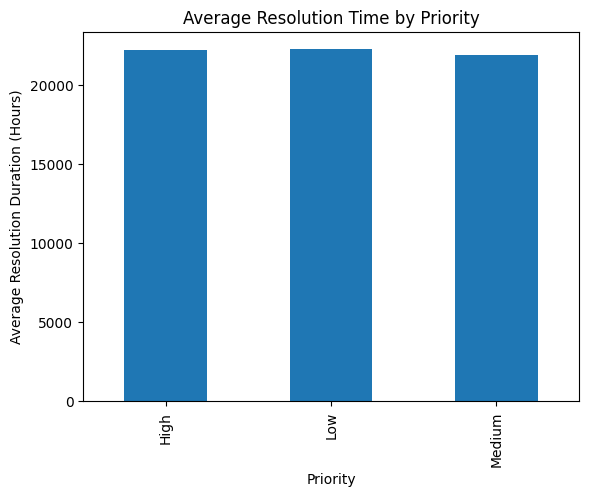

In [4]:
plt.figure()
avg_resolution_priority.plot(kind='bar')
plt.xlabel("Priority")
plt.ylabel("Average Resolution Duration (Hours)")
plt.title("Average Resolution Time by Priority")
plt.show()


High-priority tickets are not treated urgently enough

Average Resolution Time by Type

In [5]:
avg_resolution_type = df.groupby('Type')['Resolution_Duration'].mean()
avg_resolution_type


,Resolution_Duration
Type,
Change,22185.248270
Incident,22418.919388
Request,22071.971636


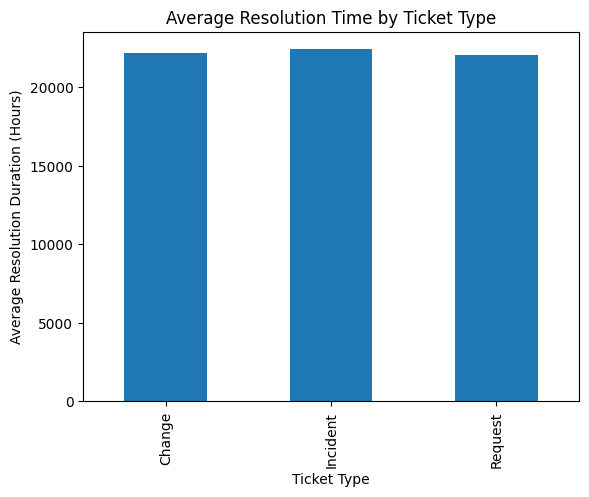

In [6]:
plt.figure()
avg_resolution_type.plot(kind='bar')
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Duration (Hours)")
plt.title("Average Resolution Time by Ticket Type")
plt.show()


In [9]:
high_priority_df = df[df['Priority'] == 'High']

avg_high_priority_type = high_priority_df.groupby('Type')['Resolution_Duration'].mean()
avg_high_priority_type


,Resolution_Duration
Type,
Change,26066.837780
Incident,22488.026249
Request,21780.682381


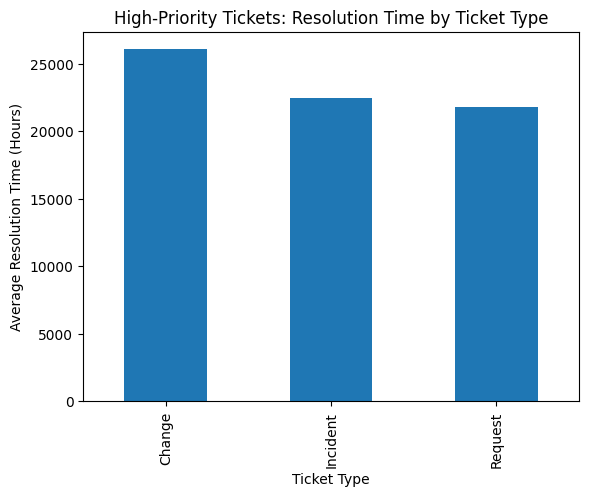

In [10]:
plt.figure()
avg_high_priority_type.plot(kind='bar')
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("High-Priority Tickets: Resolution Time by Ticket Type")
plt.show()


Identify Unresolved Tickets

In [11]:
unresolved_tickets = df[df['Resolution time'].isna()]
unresolved_tickets.shape[0]

1552

Filter Unresolved High-Priority Tickets

In [12]:
unresolved_high_priority = unresolved_tickets[
    unresolved_tickets['Priority'] == 'High'
]
unresolved_high_priority.shape[0]

275

Unresolved Tickets by Priority

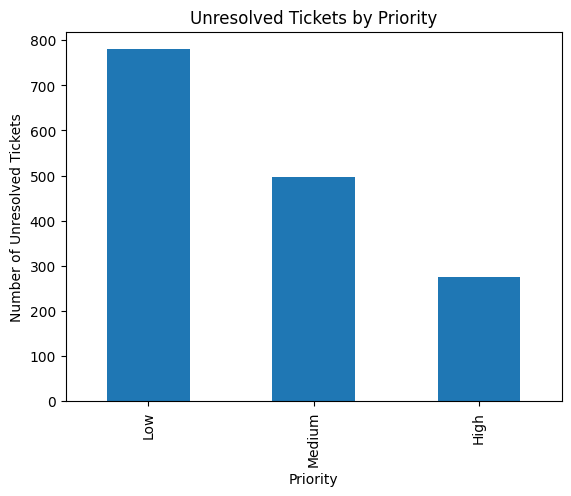

In [13]:
unresolved_priority_counts = unresolved_tickets['Priority'].value_counts()
unresolved_priority_counts
plt.figure()
unresolved_priority_counts.plot(kind='bar')
plt.xlabel("Priority")
plt.ylabel("Number of Unresolved Tickets")
plt.title("Unresolved Tickets by Priority")
plt.show()


Analyze Resolution Time Trend Over Time (Monthly)

In [14]:
df['Created time'] = pd.to_datetime(df['Created time'], errors='coerce')
df['Month'] = df['Created time'].dt.to_period('M')


In [15]:
avg_resolution_time_monthly = (
    df.groupby('Month')['Resolution_Duration']
    .mean()
)
avg_resolution_time_monthly


,Resolution_Duration
Month,
2023-01,21751.352728
2023-02,22490.264773
2023-03,23037.382430
2023-04,21918.331945
2023-05,21918.629277
2023-06,22466.567692
2023-07,21416.625961
2023-08,22345.596852
2023-09,22164.039445


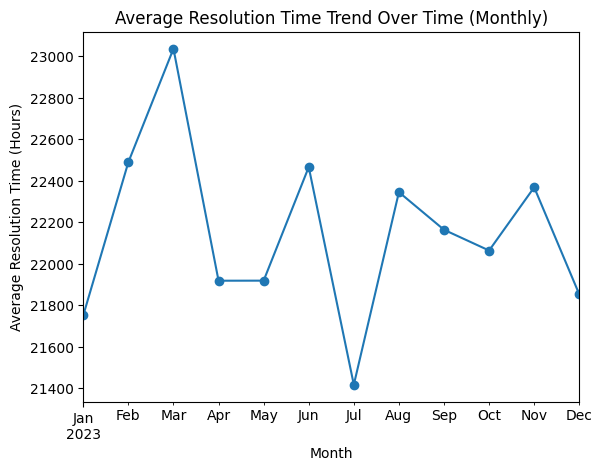

In [16]:
plt.figure()
avg_resolution_time_monthly.plot(kind='line', marker='o')
plt.xlabel("Month")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("Average Resolution Time Trend Over Time (Monthly)")
plt.show()


Determine which countries or teams handle tickets fastest

In [17]:
avg_resolution_country = (
    df.groupby('Country')['Resolution_Duration']
    .mean()
    .sort_values()
)

avg_resolution_country

,Resolution_Duration
Country,
France,21262.300380
Greece,21511.038334
Bulgaria,21677.220167
Spain,21824.733148
Germany,21893.117829
United Kingdom,21915.005555
Republic of Ireland,21953.196334
Slovenia,22240.449555
Italy,22262.664371


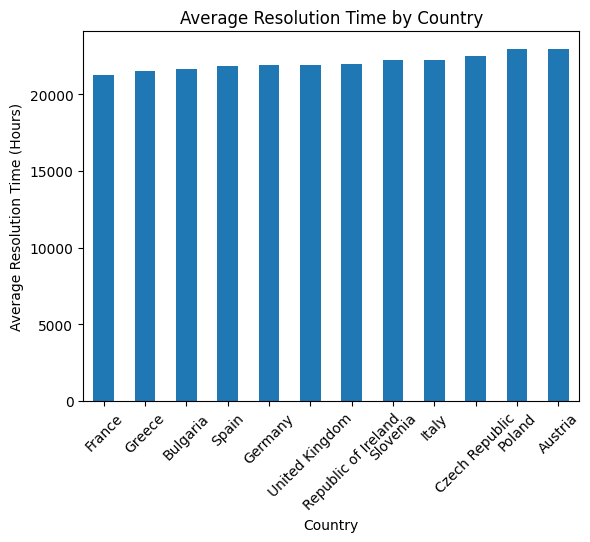

In [18]:
plt.figure()
avg_resolution_country.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("Average Resolution Time by Country")
plt.xticks(rotation=45)
plt.show()


Overall Performance by Ticket Type

In [21]:
high_df = df[df['Priority'] == 'High']
avg_high_country = (
    high_df.groupby('Country')['Resolution_Duration']
    .mean()
    .sort_values()
)
avg_high_country


,Resolution_Duration
Country,
Bulgaria,19802.499165
Greece,20123.235835
Spain,20208.048335
France,21186.890835
Republic of Ireland,21296.904170
Germany,22291.318668
Italy,22326.600927
Slovenia,22843.467498
Czech Republic,23013.114165


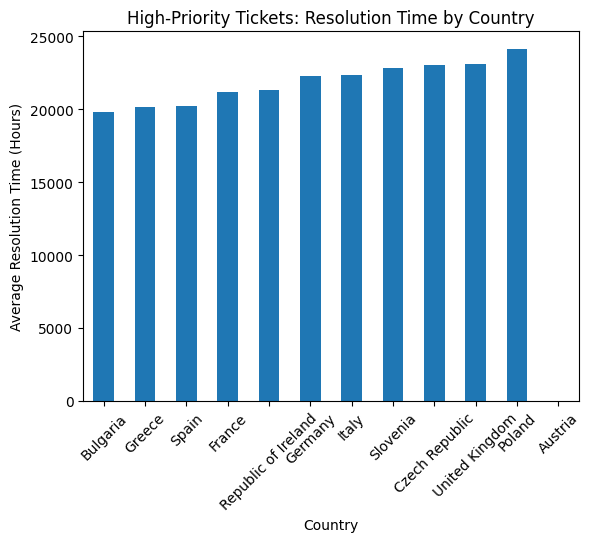

In [23]:
plt.figure()
avg_high_country.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("High-Priority Tickets: Resolution Time by Country")
plt.xticks(rotation=45)
plt.show()


In [24]:
avg_high_type = (
    high_df.groupby('Type')['Resolution_Duration']
    .mean()
    .sort_values()
)
avg_high_type


,Resolution_Duration
Type,
Request,21780.682381
Incident,22488.026249
Change,26066.837780


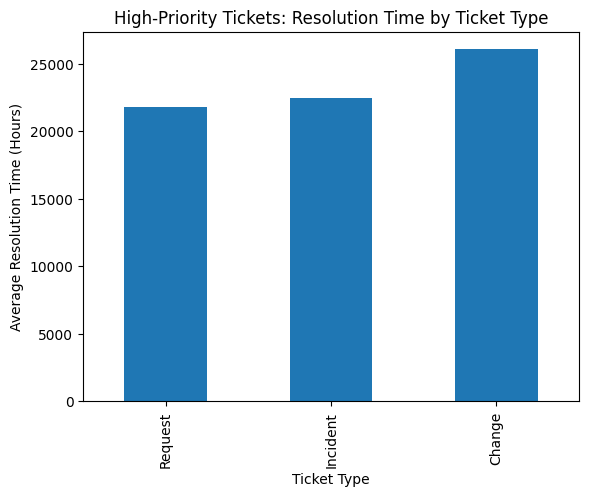

In [25]:
plt.figure()
avg_high_type.plot(kind='bar')
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.title("High-Priority Tickets: Resolution Time by Ticket Type")
plt.show()
